In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [75]:
train = pd.read_csv('../data/titanic/train.csv')
test = pd.read_csv('../data/titanic/test.csv')
data_df = pd.concat([train,test])

In [76]:
# 훈련 및 테스트 데이터 세트 결합
train_test_data = [train, test]

---
### Title
---

In [77]:
# Name값에서 성별 정보 추출
# 정규표현식으로 [문자]. 으로 끝나는 문자열 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [78]:

# Name값에서 추출한 성별정보의 갯수 확인
# train data set
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [79]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [80]:
title_mapping = {
      'Mr' : 0
    , 'Miss' : 1
    , 'Mrs' : 2
    , 'Master' : 3
    , 'Dr' : 4
    , 'Rev' : 4
    , 'Mlle' : 4
    , 'Major' : 4
    , 'Col' : 4
    , 'Countess' : 4
    , 'Capt' : 4
    , 'Ms' : 4
    , 'Sir' : 4
    , 'Lady' : 4
    , 'Mme' : 4
    , 'Don' : 4
    , 'Jonkheer' : 4
}
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [81]:
title_mapping = {
    'Mr' : 0 ,  'Miss' : 1, 'Mrs' : 2, 'Master' : 3 , 'Ms' : 4, 'Col' : 4, 'Rev' : 4, 'Dr' : 4, 'Dona' : 4
}
test['Title']= test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


---
### 성별
---

In [82]:
# 성별에 숫자 매핑
sex_mapping = {'male': 0, 'female':1}

In [83]:
# 반복문으로 매핑결과 데이터에 적용
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [85]:
train.sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
504,505,1,1,"Maioni, Miss. Roberta",1,16.0,0,0,110152,86.500,B79,S,1
257,258,1,1,"Cherry, Miss. Gladys",1,30.0,0,0,110152,86.500,B77,S,1
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.500,B77,S,4
262,263,0,1,"Taussig, Mr. Emil",0,52.0,1,1,110413,79.650,E67,S,0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",1,39.0,1,1,110413,79.650,E67,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,"Harknett, Miss. Alice Phoebe",1,NaN,0,0,W./C. 6609,7.550,NaN,S,1
92,93,0,1,"Chaffee, Mr. Herbert Fuller",0,46.0,1,0,W.E.P. 5734,61.175,E31,S,0
219,220,0,2,"Harris, Mr. Walter",0,30.0,0,0,W/C 14208,10.500,NaN,S,0
540,541,1,1,"Crosby, Miss. Harriet R",1,36.0,0,2,WE/P 5735,71.000,B22,S,1


---
### groupsize
---

In [86]:
# ticket_unique = train['Ticket'].unique()

In [87]:
train.groupby(['Ticket','Cabin']).value_counts()

Ticket             Cabin  PassengerId  Survived  Pclass  Name                                                      Sex  Age   SibSp  Parch  Fare    Embarked  Title
110152             B77    258          1         1       Cherry, Miss. Gladys                                      1    30.0  0      0      86.500  S         1        1
                          760          1         1       Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)  1    33.0  0      0      86.500  S         4        1
                   B79    505          1         1       Maioni, Miss. Roberta                                     1    16.0  0      0      86.500  S         1        1
110413             E67    263          0         1       Taussig, Mr. Emil                                         0    52.0  1      1      79.650  S         0        1
                          559          1         1       Taussig, Mrs. Emil (Tillie Mandelbaum)                    1    39.0  1      1      79.650  S         2 

In [88]:
for ticket in train['Ticket'].unique():
    train.loc[train['Ticket']==ticket,'group_size'] = len(train[train['Ticket']==ticket])

for ticket in test['Ticket'].unique():
    test.loc[test['Ticket']==ticket,'group_size'] = len(test[test['Ticket']==ticket])

In [89]:
train['Fare'] = train['Fare'] / train['group_size']
test['Fare'] = test['Fare'] / test['group_size']

In [90]:
train['group_size'].value_counts(), test['group_size'].value_counts()

(group_size
 1.0    547
 2.0    188
 3.0     63
 4.0     44
 7.0     21
 6.0     18
 5.0     10
 Name: count, dtype: int64,
 group_size
 1.0    321
 2.0     66
 3.0     18
 4.0      8
 5.0      5
 Name: count, dtype: int64)

In [91]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset.loc[dataset['group_size'] == 1, 'group_size'] = 0
    dataset.loc[dataset['group_size'] == 2, 'group_size'] = 0.4
    dataset.loc[(dataset['group_size'] == 3) | (dataset['group_size'] == 4), 'group_size'] = 0.8
    dataset.loc[dataset['group_size'] > 4, 'group_size'] = 1.2

---
## age
---

In [92]:
train.loc[train['Age'].isnull(), 'Null_Age'] = 0
test.loc[test['Age'].isnull(), 'Null_Age'] = 0

train.loc[train['Age'].notnull(), 'Null_Age'] = 1
test.loc[test['Age'].notnull(), 'Null_Age'] = 1
 

In [93]:
# train data set
train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'), inplace=True)

# test data set
test['Age'].fillna(test.groupby('Title')['Age'].transform('mean'), inplace=True)

In [94]:
train['Age_Group'] = train['Age']
test['Age_Group'] = test['Age']

train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['Age_Group'] <= 10,'Age_Group'] = 0
    train_cp.loc[(train_cp['Age_Group'] > 10) & (train_cp['Age_Group'] <= 20 ),'Age_Group'] = 1
    train_cp.loc[(train_cp['Age_Group'] > 20) & (train_cp['Age_Group'] <= 40 ),'Age_Group'] = 2
    train_cp.loc[(train_cp['Age_Group'] > 40) & (train_cp['Age_Group'] <= 60 ),'Age_Group'] = 3
    train_cp.loc[train_cp['Age_Group'] > 60,'Age_Group'] = 4

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
group_size       0
Null_Age         0
Age_Group        0
dtype: int64

In [95]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
group_size       0
Null_Age         0
Age_Group        0
dtype: int64

In [96]:
print(train[train['Age'].isnull()])
print(test[test['Age'].isnull()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, group_size, Null_Age, Age_Group]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, group_size, Null_Age, Age_Group]
Index: []


In [97]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 17, 'Age'] =0
    dataset.loc[(dataset['Age'] >17) & (dataset['Age'] <= 24), 'Age'] = 1
    dataset.loc[(dataset['Age'] >24) & (dataset['Age'] <= 34), 'Age'] = 2
    dataset.loc[(dataset['Age'] >34) & (dataset['Age'] <= 44), 'Age'] = 3
    dataset.loc[(dataset['Age'] >44) & (dataset['Age'] <= 60), 'Age'] = 4
    dataset.loc[dataset['Age'] >60, 'Age'] = 5

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,group_size,Null_Age,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0,1.0,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2,0.0,1.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0,1.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,26.5500,C123,S,2,0.4,1.0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,S,0,0.0,1.0,2.0


In [98]:
# 나이대별 생사여부 확인
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()

---
### Embarked
---

In [99]:
# 좌석별 승선 항구 확인하기
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [100]:
# DataFrame으로 만들어 인덱스 주기 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

In [101]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [102]:
# 머신러닝 Classifier를 위해 텍스트 숫자 변경(매핑)
embarked_mapping = {'S':0, 'C':1, 'Q':2}

# map 함수 사용해서 처리
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

---
### Fare
---

In [103]:
# 탑승권 가격이 결측값일 경우, 좌석 등급별 중간값으로 대치
# train data set
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# test data set
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [104]:
train_test_data = [train,test]
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 7,'Fare'] = 0
    dataset.loc[(dataset['Fare'] >7) & (dataset['Fare'] <=8.8), 'Fare'] = 0.4
    dataset.loc[(dataset['Fare'] >8.8) & (dataset['Fare'] <=17), 'Fare'] = 0.8
    dataset.loc[(dataset['Fare'] >17) & (dataset['Fare'] <=30), 'Fare'] = 1.2
    dataset.loc[(dataset['Fare'] >30) & (dataset['Fare'] <=100), 'Fare'] = 1.6
    dataset.loc[dataset['Fare'] > 100,'Fare'] = 2

---
### Cabin
---

In [105]:
train.loc[train['Cabin'].isnull(), 'Null_Cabin'] = 0
test.loc[test['Cabin'].isnull(), 'Null_Cabin'] = 0

train.loc[train['Cabin'].notnull(), 'Null_Cabin'] = 1
test.loc[test['Cabin'].notnull(), 'Null_Cabin'] = 1

In [106]:
# 반복문을 통해 객실번호의 알파벳과 숫자 분리 후, 알파벳만 뽑아오기
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

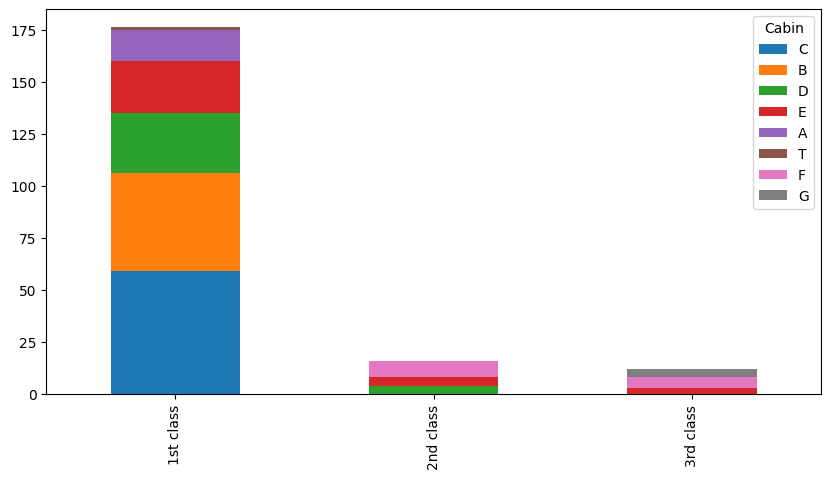

In [107]:
# 클래스별로 객실 종류 count
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind='bar', stacked=True, figsize=(10,5))

In [108]:
# classifier를 위해 매핑
# feature scaling : raw data 전처리하는 과정 (feature들의 크기, 범위 정규화)/ 소수점 사용
# 숫자의 범위가 비슷하지 않으면 먼 거리에 있는 데이터를 조금 더 중요하게 생각할 수 있음 주의

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [109]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# # fillna
train['Cabin'].fillna(
        train.groupby('Pclass')['Cabin'].transform('median')
    ,   inplace=True
)
test['Cabin'].fillna(
        test.groupby('Pclass')['Cabin'].transform('median')
    ,   inplace=True
)
train.isnull().sum(), test.isnull().sum()
# train.tail(10)

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Title          0
 group_size     0
 Null_Age       0
 Age_Group      0
 Null_Cabin     0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Title          0
 group_size     0
 Null_Age       0
 Age_Group      0
 Null_Cabin     0
 dtype: int64)

---
### Family Size
---

In [110]:
# 혼자타면 SibSp, Parch 모두 0으로 표시되므로 +1 해주기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [111]:
# alone = []
# for f in train['FamilySize']: 
#     if f > 1 :
#         alone.append(1)
#     else: 
#         alone.append(0)
# train['Alone'] = alone

In [112]:
# alone = []
# for f in test['FamilySize']: 
#     if f > 1 :
#         alone.append(1)
#     else: 
#         alone.append(0)
# test['Alone'] = alone

In [113]:
train['FamilySize'].value_counts(),test['FamilySize'].value_counts()

(FamilySize
 1     537
 2     161
 3     102
 4      29
 6      22
 5      15
 7      12
 11      7
 8       6
 Name: count, dtype: int64,
 FamilySize
 1     253
 2      74
 3      57
 4      14
 5       7
 7       4
 11      4
 6       3
 8       2
 Name: count, dtype: int64)

In [114]:
data_df['Lastname'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Lastname', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Lastname', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


In [115]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train['Family_Survival'] = data_df['Family_Survival'][:891]
test['Family_Survival'] = data_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    int64  
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            891 non-null    float64
 11  Embarked         891 non-null    int64  
 12  Title            891 non-null    int64  
 13  group_size       891 non-null    float64
 14  Null_Age         891 non-null    float64
 15  Age_Group        891 non-null    float64
 16  Null_Cabin       891 non-null    float64
 17  FamilySize      

In [117]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train['FamilySize'] = train['FamilySize'].map(family_mapping)
test['FamilySize'] = test['FamilySize'].map(family_mapping)

---
### 컬럼 정리
---

In [118]:
# 불필요한 데이터 삭제 : drop
# Ticket, SibSp, Parch, PassengerId 정보 제거

features_drop = ['Ticket', 'SibSp', 'Parch','Age_Group','Name']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [119]:
# train = train[['Survived','PassengerId','Pclass',	'Sex',	'Age',	'Fare',	'Cabin'	,'Embarked',	'Title',	'Null_Age',	'group_size',	'Null_Cabin',	'FamilySize']]

# test = test[['PassengerId','Pclass',	'Sex',	'Age',	'Fare',	'Cabin'	,'Embarked',	'Title',	'Null_Age',	'group_size',	'Null_Cabin',	'FamilySize']]


In [120]:
test.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
Fare               0
Cabin              0
Embarked           0
Title              0
group_size         0
Null_Age           0
Null_Cabin         0
FamilySize         0
Family_Survival    0
dtype: int64

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,Null_Age,Null_Cabin,FamilySize,Family_Survival
0,1,0,3,0,1.0,0.4,2.0,0,0,0.0,1.0,0.0,0.4,0.5
1,2,1,1,1,3.0,1.6,0.8,1,2,0.0,1.0,1.0,0.4,0.5
2,3,1,3,1,2.0,0.4,2.0,0,1,0.0,1.0,0.0,0.0,0.5
3,4,1,1,1,3.0,1.2,0.8,0,2,0.4,1.0,1.0,0.4,0.0
4,5,0,3,0,3.0,0.4,2.0,0,0,0.0,1.0,0.0,0.0,0.5


---
### 정규화
---

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'Title', 'Null_Age', 'group_size', 'Null_Cabin',
       'FamilySize','Family_Survival']
# 객체 생성
scaler = MinMaxScaler()
# 데이터 셑 변환, fit(), transform()
scaler.fit(train[columns])
scaled = scaler.transform(train[columns])

#transforma()시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 DataFrame으로 변환
df_train = pd.DataFrame(data=scaled, columns=columns)

print('최솟값')             # 0에 가까워짐
print(df_train.min())
print('\n최댓값')
print(df_train.max()) 

최솟값
Pclass             0.0
Sex                0.0
Age                0.0
Fare               0.0
Cabin              0.0
Embarked           0.0
Title              0.0
Null_Age           0.0
group_size         0.0
Null_Cabin         0.0
FamilySize         0.0
Family_Survival    0.0
dtype: float64

최댓값
Pclass             1.0
Sex                1.0
Age                1.0
Fare               1.0
Cabin              1.0
Embarked           1.0
Title              1.0
Null_Age           1.0
group_size         1.0
Null_Cabin         1.0
FamilySize         1.0
Family_Survival    1.0
dtype: float64


In [53]:
columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'Title', 'Null_Age', 'group_size', 'Null_Cabin',
       'FamilySize','Family_Survival']
# 객체 생성
scaler = MinMaxScaler()
# 데이터 셑 변환, fit(), transform()
scaler.fit(test[columns])
scaled = scaler.transform(test[columns])

#transforma()시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 DataFrame으로 변환
df_test = pd.DataFrame(data=scaled, columns=columns)

print('최솟값')             # 0에 가까워짐
print(df_test.min())
print('\n최댓값')
print(df_test.max()) 

최솟값
Pclass             0.0
Sex                0.0
Age                0.0
Fare               0.0
Cabin              0.0
Embarked           0.0
Title              0.0
Null_Age           0.0
group_size         0.0
Null_Cabin         0.0
FamilySize         0.0
Family_Survival    0.0
dtype: float64

최댓값
Pclass             1.0
Sex                1.0
Age                1.0
Fare               1.0
Cabin              1.0
Embarked           1.0
Title              1.0
Null_Age           1.0
group_size         1.0
Null_Cabin         1.0
FamilySize         1.0
Family_Survival    1.0
dtype: float64


In [54]:
train.loc[:,columns] = df_train
test.loc[:,columns] = df_test

---
### train survived 분리
---

In [55]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 13), (891,))

In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'Title', 'group_size', 'Null_Age', 'Null_Cabin',
       'FamilySize', 'Family_Survival'],
      dtype='object')

---
### modeling
---

In [73]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'group_size', 'Null_Age', 'Null_Cabin', 'FamilySize',
       'Family_Survival'],
      dtype='object')

In [57]:
train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,Null_Age,Null_Cabin,FamilySize,Family_Survival
0,1,1.0,0,0.2,0.2,0.714286,0.0,0.00,0.000000,1.0,0.0,0.1,0.5
1,2,0.0,1,0.6,0.8,0.285714,0.5,0.50,0.000000,1.0,1.0,0.1,0.5
2,3,1.0,1,0.4,0.2,0.714286,0.0,0.25,0.000000,1.0,0.0,0.0,0.5
3,4,0.0,1,0.6,0.6,0.285714,0.0,0.50,0.333333,1.0,1.0,0.1,0.0
4,5,1.0,0,0.6,0.2,0.714286,0.0,0.00,0.000000,1.0,0.0,0.0,0.5


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.5364294631710363


In [60]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = DecisionTreeClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.7665168539325843


In [61]:
# k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
# clf = RandomForestClassifier(n_estimators=60, max_depth=4) # Knn Model object
# scoring = 'accuracy' #평가지표 : 정확도
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# print(score.mean())

---
### random_forest fitting 코드
---

In [63]:
listr = []
for r in range(1):
    clf = RandomForestClassifier(
                              max_depth=4
                              ,n_estimators=69
                             ,min_samples_leaf=32
                             , random_state=993
                             ,n_jobs=-1
                                 )
    clf.fit(train_data, target) # 학습
    pred = clf.predict(test) # 테스트 데이터로 예측값 추출    
    submission1 = pd.read_csv('../data/submission_a.csv')
    del submission1['PassengerId']
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(pred, submission1)
    print(r,accuracy)
    listr.append(accuracy)
print(listr.index(max(listr)),max(listr))

0 0.8373205741626795
0 0.8373205741626795


---
## 하이퍼파라미터찾기 베이지안
---

In [64]:
# submission1 = pd.read_csv('../답/submission (1).csv')
# del submission1['PassengerId']

In [65]:
# from hyperopt import hp , STATUS_OK

# rf_search_space = {'max_depth': hp.quniform('max_depth', 1,30,1), 
#                     'random_state': hp.quniform('random_state', 1,1000,1),
#                     'n_estimators': hp.quniform('n_estimators', 1,1000,1),
#                     'min_samples_leaf': hp.quniform('min_samples_leaf', 1,30,1)}

In [66]:
# def objective_func(search_space):
#     rf_clf = RandomForestClassifier(n_estimators=int(search_space['n_estimators'])
#                             , max_depth=int(search_space['max_depth'])
#                             ,random_state=int(search_space['random_state'])
#                             ,min_samples_leaf=int(search_space['min_samples_leaf'])
#                            )
#     rf_clf.fit(train_data , target)
#     pred = rf_clf.predict(test)
#     submission1 = pd.read_csv('../답/submission (1).csv')
#     del submission1['PassengerId']
#     from sklearn.metrics import accuracy_score
#     accuracy = accuracy_score(pred, submission1)
#     return {'loss' : -accuracy, 'status' : STATUS_OK}

In [67]:
# from hyperopt import fmin, tpe, Trials

# trials = Trials()

# # fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
# best = fmin(fn=objective_func,
#             space=rf_search_space,
#             algo=tpe.suggest,
#             max_evals=3000, # 최대 반복 횟수를 지정합니다.
#             trials=trials)
#             # rstate=np.random.default_rng(seed=))
# print(best)

---
### randomForest
---

In [68]:
clf = RandomForestClassifier(
                               max_depth=4
                              ,n_estimators=69
                             ,min_samples_leaf=32
                             , random_state=993
                                 )
clf.fit(train_data, target) # 학습
pred = clf.predict(test) # 테스트 데이터로 예측값 추출

---
### 컬럼 관련도
---

In [69]:
# feature importance 추출

print("Feature importances:\n{0}".format(np.round(clf.feature_importances_,3)))

# feature 별 importance 매핑

for name, value in zip(train_data.columns
                       ,clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

Feature importances:
[0.015 0.084 0.227 0.015 0.038 0.091 0.003 0.333 0.017 0.001 0.036 0.018
 0.121]
PassengerId : 0.015
Pclass : 0.084
Sex : 0.227
Age : 0.015
Fare : 0.038
Cabin : 0.091
Embarked : 0.003
Title : 0.333
group_size : 0.017
Null_Age : 0.001
Null_Cabin : 0.036
FamilySize : 0.018
Family_Survival : 0.121


---
### random_forest 파일저장
---

In [70]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
        "Survived": pred
    }
)
submission.to_csv('../result/titanic83.7.csv', index=False)

OSError: Cannot save file into a non-existent directory: '..\result'

---
### 정확도 평가 캐글에 올리지 않아도 됨
---

In [ ]:
submission1 = pd.read_csv('../답/submission (1).csv')
del submission1['PassengerId']
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, submission1)
accuracy

0.8373205741626795

---
### Xgboost
---

In [ ]:
# xgboost  = XGBClassifier()
# xgboost.fit(train_data, target)
# scoring = 'accuracy'
# score = cross_val_score(xgboost, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# Y_pred = xgboost.predict(test)
# print(score.mean())

# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('../result/titanic-3.csv', index=False)

In [ ]:
# xgboost  = XGBClassifier()
# xgboost.fit(train_data, target)
# Y_pred = xgboost.predict(test)
# submission1 = pd.read_csv('./답/submission (1).csv')
# del submission1['PassengerId']
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(Y_pred, submission1)
# print(accuracy)

---
### logistic
---

In [ ]:
# logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
# logmodel.fit(train_data,target)
# scoring = 'accuracy'
# score = cross_val_score(logmodel, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# predictions = logmodel.predict(test)
# score.mean()

In [ ]:
# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": predictions
#     })
# submission.to_csv('../result/titanic-4.csv', index=False)